In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import t
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
drafted = pd.read_csv('drafted.csv')
undrafted = pd.read_csv('undrafted.csv')
draft_df = pd.read_csv('careers_df.csv')

In [3]:
drafted.head()
print(drafted.shape)

(1122, 31)


In [4]:
undrafted.head()
print(undrafted.shape)

(511, 27)


In [5]:
draft_df.head()
print(draft_df.shape)

(1633, 27)


In [6]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1633 non-null   float64
 1   Name             1633 non-null   object 
 2   College          1632 non-null   object 
 3   POS              1633 non-null   object 
 4   Height (in)      1633 non-null   float64
 5   Weight (lbs)     1633 non-null   float64
 6   40 Yard          1409 non-null   float64
 7   Bench Press      1225 non-null   float64
 8   Vert Leap (in)   1237 non-null   float64
 9   Broad Jump (in)  1235 non-null   float64
 10  Shuttle          1038 non-null   float64
 11  3Cone            1030 non-null   float64
 12  Win-Loss Record  1460 non-null   object 
 13  Round            1122 non-null   float64
 14  Pick             1122 non-null   float64
 15  Team             1122 non-null   object 
 16  Age              1060 non-null   float64
 17  To            

In [7]:
draft_df['Broad Jump (in)'].replace(np.nan, np.mean(draft_df['Broad Jump (in)']), inplace=True)
draft_df['Bench Press'].replace(np.nan, np.mean(draft_df['Bench Press']), inplace=True)
draft_df['40 Yard'].replace(np.nan, np.mean(draft_df['40 Yard']), inplace=True)
draft_df['Vert Leap (in)'].replace(np.nan, np.mean(draft_df['Vert Leap (in)']), inplace=True)
draft_df['Shuttle'].replace(np.nan, np.mean(draft_df['Shuttle']), inplace=True)
draft_df['3Cone'].replace(np.nan, np.mean(draft_df['3Cone']), inplace=True)

In [8]:
drafted['PB_Select'] = 0
drafted.loc[drafted['PB'] > 0, 'PB_Select'] = 1
drafted.PB_Select

0       0
1       0
2       0
3       0
4       0
       ..
1117    0
1118    0
1119    0
1120    0
1121    0
Name: PB_Select, Length: 1122, dtype: int64

In [9]:
drafted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1122 non-null   float64
 1   Name             1122 non-null   object 
 2   College          1121 non-null   object 
 3   POS              1122 non-null   object 
 4   Height (in)      1122 non-null   float64
 5   Weight (lbs)     1122 non-null   float64
 6   40 Yard          1122 non-null   float64
 7   Bench Press      1122 non-null   float64
 8   Vert Leap (in)   1122 non-null   float64
 9   Broad Jump (in)  1122 non-null   float64
 10  Shuttle          1122 non-null   float64
 11  3Cone            1122 non-null   float64
 12  Win-Loss Record  1005 non-null   object 
 13  Round            1122 non-null   float64
 14  Pick             1122 non-null   float64
 15  Team             1122 non-null   object 
 16  Age              1060 non-null   float64
 17  To            

In [10]:
draft_df['Drafted'] = draft_df.Drafted.replace(['D', 'U'], [1, 0])
draft_df.Drafted.unique()

array([1, 0], dtype=int64)

# Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y = (draft_df.Drafted).values
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']].values
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size=0.30, random_state=123)

X_scaled = preprocessing.scale(Xlr)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_scaled, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7020408163265306


In [12]:
logreg = LogisticRegression()
logreg.fit(X_scaled, ylr)
y_pred = logreg.predict(Xtestlr)

print(confusion_matrix(ytestlr, y_pred))
print(classification_report(ytestlr, y_pred))

[[  0 146]
 [  0 344]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.70      1.00      0.82       344

    accuracy                           0.70       490
   macro avg       0.35      0.50      0.41       490
weighted avg       0.49      0.70      0.58       490



C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [14]:
clf = LogisticRegression()
score = cv_score(clf, X_scaled, ylr)
print(score)

0.6859036236880411


In [15]:
# your turn
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.1, 1, 10, 100]}
clfl3 = LogisticRegression()
clf_fit = GridSearchCV(clfl3, param_grid=params, cv=5, scoring='accuracy')
clf_fit.fit(X_scaled, ylr)

clf_fit.best_estimator_, clf_fit.best_params_, clf_fit.best_score_

(LogisticRegression(C=0.1), {'C': 0.1}, 0.6911897648050257)

In [16]:
clfl4=LogisticRegression(C=clf_fit.best_params_['C'])
clfl4.fit(X_scaled, ylr)
ylrpred1 = clfl4.predict(Xtestlr)
accuracy_score(ylrpred1, ytestlr)

0.7020408163265306

In [17]:
logreg = LogisticRegression()
logreg.fit(X_scaled, ylr)
y_pred = logreg.predict(Xtestlr)

print(confusion_matrix(ytestlr, y_pred))
print(classification_report(ytestlr, y_pred))

[[  0 146]
 [  0 344]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.70      1.00      0.82       344

    accuracy                           0.70       490
   macro avg       0.35      0.50      0.41       490
weighted avg       0.49      0.70      0.58       490



C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression with PCA

In [78]:
pca = PCA()
log = LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', log)])

In [79]:
pca.get_params().keys()

dict_keys(['copy', 'iterated_power', 'n_components', 'random_state', 'svd_solver', 'tol', 'whiten'])

In [80]:
y = (draft_df.Drafted).values
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']].values
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size=0.30, random_state=123)

X_scaled = preprocessing.scale(Xlr)


param_grid = {'pca__n_components': [2, 4, 6, 8],
             'logistic__C': [0.001, 0.01, 0.1, 0.5, 1]}

search = GridSearchCV(pipe, param_grid)
search.fit(X_scaled, ylr)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.691):
{'logistic__C': 0.1, 'pca__n_components': 8}


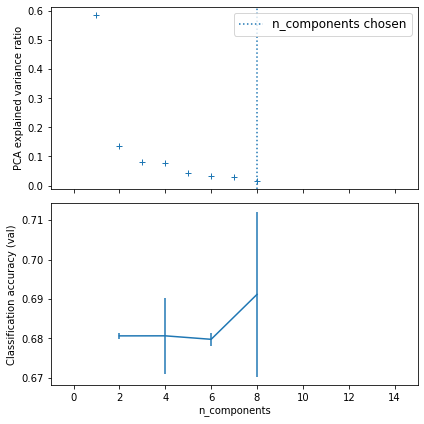

In [81]:
pca.fit(X_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 15)

plt.tight_layout()
plt.show()

# Desicion Tree

In [21]:
draft_df.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)',
       'Shuttle', '3Cone', 'Win-Loss Record', 'Round', 'Pick', 'Team', 'Age',
       'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'Solo', 'Int', 'Sacks',
       'Drafted'],
      dtype='object')

In [22]:
y = draft_df.Drafted
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [23]:
draft_dt2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

draft_dt2.fit(X_train, y_train)

y_pred = draft_dt2.predict(X_test)

y_pred = pd.Series(y_pred)

draft_dt2

DecisionTreeClassifier(criterion='entropy', max_depth=3)

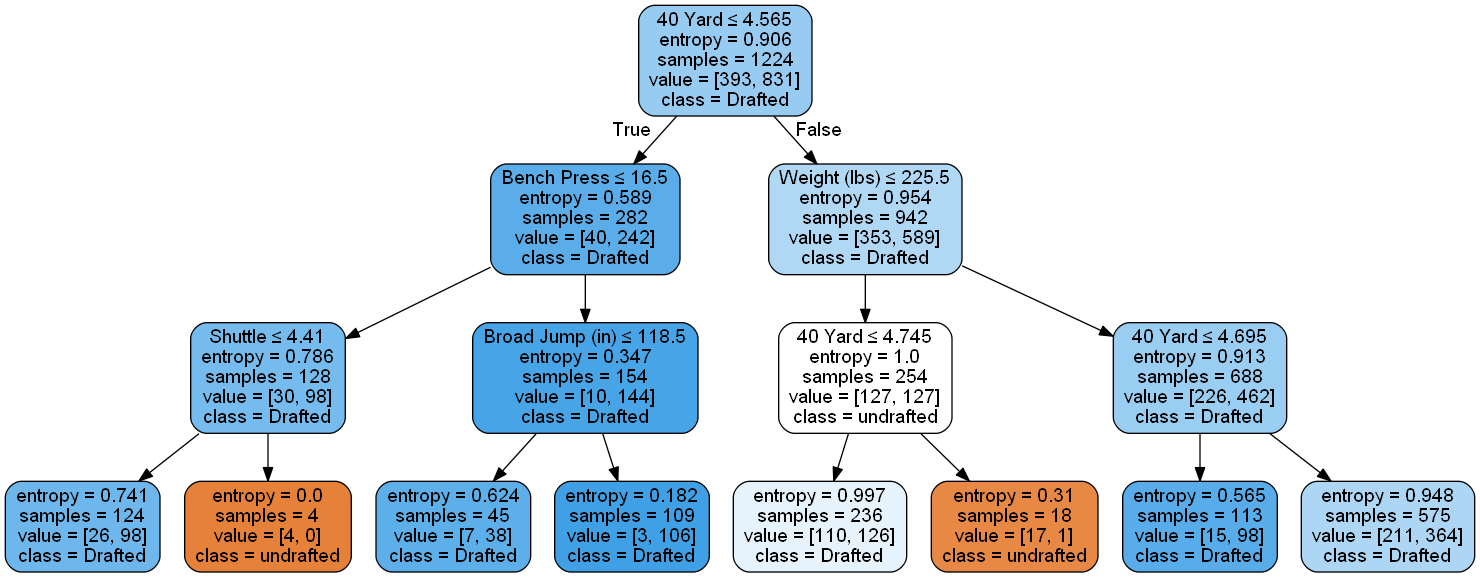

In [24]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_dt2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
# Run this block for model evaluation
print("Model Entropy max_depth = 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy max_depth = 3
Accuracy: 0.7237163814180929
Balanced accuracy: 0.5237055157551401
Precision score 0.7213930348258707
Recall score 0.05084745762711865


In [26]:
draft_gini2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

draft_gini2.fit(X_train, y_train)

y_pred = draft_gini2.predict(X_test)

y_pred = pd.Series(y_pred)

draft_gini2

DecisionTreeClassifier(max_depth=3)

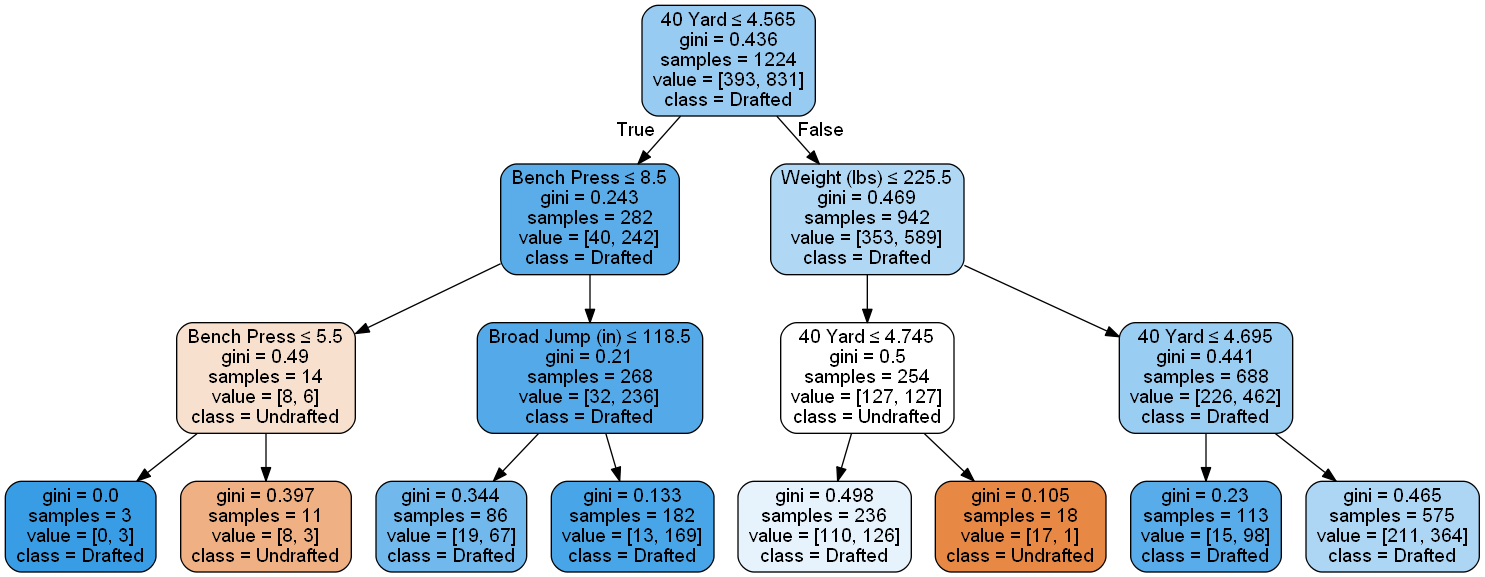

In [27]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_gini2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["Undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
# Run this block for model evaluation
print("Model Entropy max_depth = 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy max_depth = 3
Accuracy: 0.7163814180929096
Balanced accuracy: 0.5160318015027083
Precision score 0.7182044887780549
Recall score 0.0423728813559322


# Random Forest

In [29]:
draft_rf1 = RandomForestClassifier(max_depth=5, random_state=123)

draft_rf1.fit(X_train, y_train)

y_pred = draft_rf1.predict(X_test)

y_pred = pd.Series(y_pred)

draft_rf1

RandomForestClassifier(max_depth=5, random_state=123)

In [30]:
print("Random Forest Model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Random Forest Model - max depth 3
Accuracy: 0.7212713936430318
Balanced accuracy: 0.5270254528510688
Precision score 0.7229219143576826
Recall score 0.06779661016949153


In [31]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression


In [32]:
RF_pipe = make_pipeline(
    preprocessing.StandardScaler(),
    RandomForestRegressor(random_state=123))

In [33]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_default_cv_results

{'fit_time': array([0.46077418, 0.43084836, 0.50166035, 0.45578241, 0.44181919]),
 'score_time': array([0.01994133, 0.0129652 , 0.01396179, 0.01296544, 0.01296544]),
 'test_score': array([ 0.07266285,  0.09324621,  0.02681595, -0.00209741,  0.03293626])}

In [34]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([ 0.07266285,  0.09324621,  0.02681595, -0.00209741,  0.03293626])

In [35]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.04471277236972424, 0.03402022227781325)

In [36]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [preprocessing.StandardScaler(), None]
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [37]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [38]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'standardscaler': [StandardScaler(), None]})

In [39]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 143,
 'standardscaler': StandardScaler()}

In [40]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, Xlr, ylr, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.08394302, 0.03483836, 0.03090897, 0.0390075 , 0.05790098])

In [41]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.049319767211916374, 0.01963373839896006)

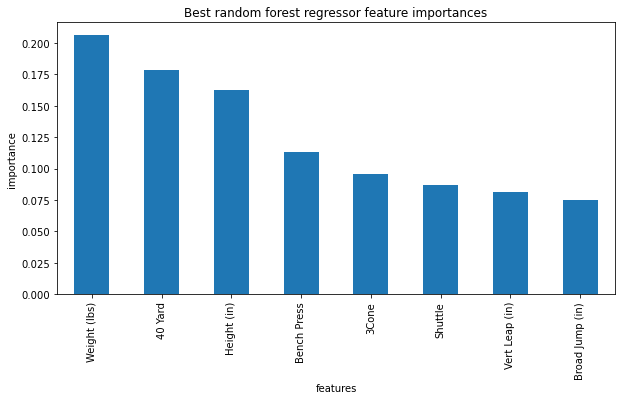

In [42]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

# Gradient Boosting

In [43]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier


In [44]:
drafted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1122 non-null   float64
 1   Name             1122 non-null   object 
 2   College          1121 non-null   object 
 3   POS              1122 non-null   object 
 4   Height (in)      1122 non-null   float64
 5   Weight (lbs)     1122 non-null   float64
 6   40 Yard          1122 non-null   float64
 7   Bench Press      1122 non-null   float64
 8   Vert Leap (in)   1122 non-null   float64
 9   Broad Jump (in)  1122 non-null   float64
 10  Shuttle          1122 non-null   float64
 11  3Cone            1122 non-null   float64
 12  Win-Loss Record  1005 non-null   object 
 13  Round            1122 non-null   float64
 14  Pick             1122 non-null   float64
 15  Team             1122 non-null   object 
 16  Age              1060 non-null   float64
 17  To            

In [45]:
drafted_num = drafted.select_dtypes(include=['float64'])
drafted_num.shape

(1122, 25)

In [70]:
y = draft_df.Drafted
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75, test_size=0.25)


In [71]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=10, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.691
Accuracy score (validation): 0.675

Learning rate:  0.1
Accuracy score (training): 0.691
Accuracy score (validation): 0.675

Learning rate:  0.25
Accuracy score (training): 0.698
Accuracy score (validation): 0.680

Learning rate:  0.5
Accuracy score (training): 0.730
Accuracy score (validation): 0.682

Learning rate:  0.75
Accuracy score (training): 0.719
Accuracy score (validation): 0.677

Learning rate:  1
Accuracy score (training): 0.741
Accuracy score (validation): 0.677



In [72]:
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)

0.6919315403422983
[[ 44  89]
 [ 37 239]]
              precision    recall  f1-score   support

           0       0.54      0.33      0.41       133
           1       0.73      0.87      0.79       276

    accuracy                           0.69       409
   macro avg       0.64      0.60      0.60       409
weighted avg       0.67      0.69      0.67       409



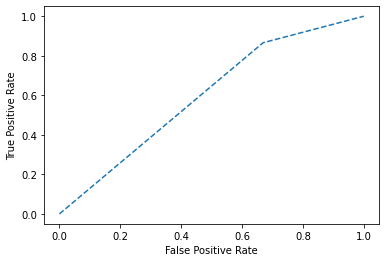

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

# Gradient Boosting with PCA

In [74]:
pca = PCA()
gb = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth = 2, random_state = 0)

pipe = Pipeline(steps=[('pca', pca), ('gradient', gb)])

In [75]:
y = draft_df.Drafted
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]
# Split the data into a training and test set
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size=0.30, random_state=123)

X_scaled = preprocessing.scale(Xlr)

param_grid = {'pca__n_components': [2, 4, 6, 8],
             'gradient__learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1]
}

search = GridSearchCV(pipe, param_grid)
search.fit(X_scaled, ylr)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.695):
{'gradient__learning_rate': 0.25, 'pca__n_components': 8}


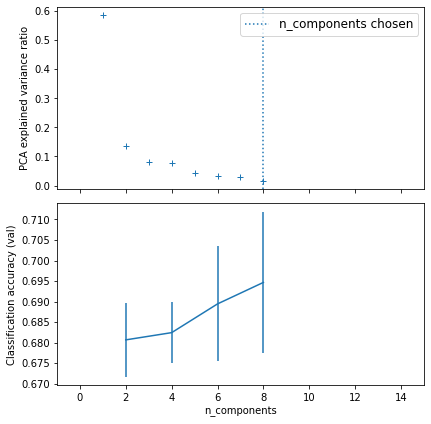

In [76]:
pca.fit(X_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 15)

plt.tight_layout()
plt.show()

[ 0.  0. -0.  0.  0.  0. -0. -0.]


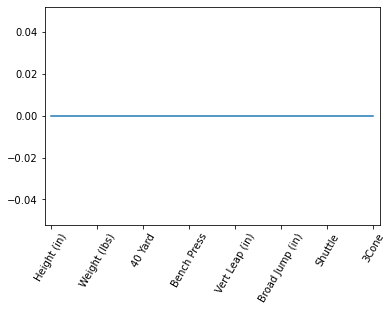

In [77]:
# Import Lasso
from sklearn.linear_model import Lasso


y = draft_df['Drafted']
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75, test_size=0.25)

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_scaled, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X_scaled, y).coef_
print(lasso_coef)
drafted_columns = X.columns
#Plot the coefficients
plt.plot(range(len(drafted_columns)), lasso_coef)
plt.xticks(range(len(drafted_columns)), drafted_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# Unsupervised Learning

In [82]:
unlabeled_draft = draft_df.drop('Drafted', axis=1)
unlabeled_draft = unlabeled_draft.select_dtypes(include=['float64'])
unlabeled_draft = unlabeled_draft.dropna(axis=1)
unlabeled_draft = unlabeled_draft.drop('Year', axis=1)
scaler = preprocessing.StandardScaler().fit(unlabeled_draft)
unlabeled_scaled = scaler.transform(unlabeled_draft)
unlabeled_scaled = pd.DataFrame(unlabeled_scaled)
unlabeled_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1633 non-null   float64
 1   1       1633 non-null   float64
 2   2       1633 non-null   float64
 3   3       1633 non-null   float64
 4   4       1633 non-null   float64
 5   5       1633 non-null   float64
 6   6       1633 non-null   float64
 7   7       1633 non-null   float64
dtypes: float64(8)
memory usage: 102.2 KB


In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(unlabeled_scaled)
print(pca.explained_variance_)
print(pca.components_)

[4.67791807 1.09753793]
[[ 0.2903537   0.40140896  0.405336    0.27124565 -0.34350359 -0.37217538
   0.35757142  0.36376854]
 [-0.54959886 -0.34377731 -0.02841615 -0.45401462 -0.37498157 -0.30242711
   0.28140709  0.2481093 ]]


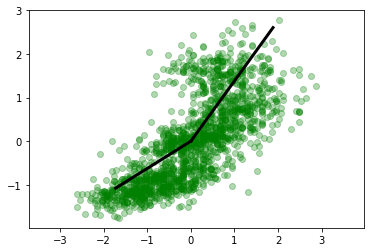

In [84]:
plt.plot(unlabeled_scaled.iloc[:, 0], unlabeled_scaled.iloc[:, 1], 'og', alpha=0.3)
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)

In [85]:
clf = PCA(0.95)
unlabeled_trans = clf.fit_transform(unlabeled_scaled)
print(unlabeled_scaled.shape)
print(unlabeled_trans.shape)

(1633, 8)
(1633, 6)


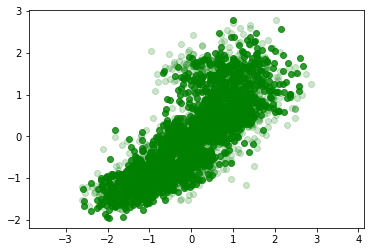

In [86]:
unlabeled_new = clf.inverse_transform(unlabeled_trans)
plt.plot(unlabeled_scaled.iloc[:, 0], unlabeled_scaled.iloc[:, 1], 'og', alpha=0.2)
plt.plot(unlabeled_new[:, 0], unlabeled_new[:, 1], 'og', alpha=0.8)
plt.axis('equal');

# KMeans 

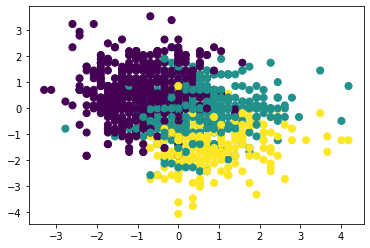

In [120]:
from sklearn.cluster import KMeans
est = KMeans(3)
est.fit(unlabeled_scaled)
y_means = est.predict(unlabeled_scaled)
plt.scatter(unlabeled_scaled.iloc[:,3], unlabeled_scaled.iloc[:, 4], c=y_means, s=50)

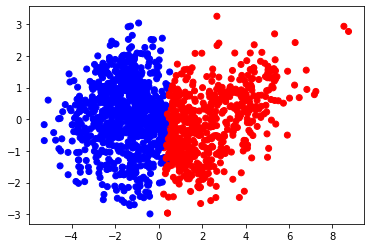

In [121]:
import matplotlib.colors

model = KMeans(n_clusters = 2)
cluster_assignments = model.fit_predict(unlabeled_scaled)

cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(unlabeled_scaled))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap = cmap)

Text(0, 0.5, 'Proportion of variance Explained')

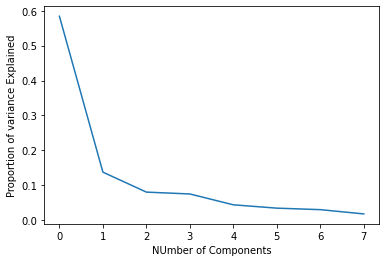

In [122]:
pca = PCA()
pca.fit(unlabeled_scaled)

variance = pca.explained_variance_ratio_

plt.plot(range(len(variance)), variance)

plt.xlabel('NUmber of Components')
plt.ylabel('Proportion of variance Explained')


In [123]:
from sklearn.cluster import AgglomerativeClustering

pca = PCA(n_components=2)
X_principle = pca.fit_transform(unlabeled_scaled)
X_principle = pd.DataFrame(X_principle)
X_principle.columns=['P1', 'P2']


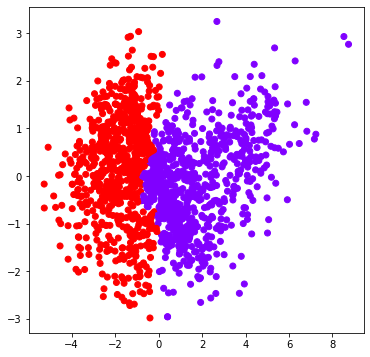

In [124]:
agglo = AgglomerativeClustering(n_clusters=2)
agg = agglo.fit_predict(X_principle)

plt.figure(figsize=(6,6))
plt.scatter(X_principle['P1'], X_principle['P2'], c = agg, cmap='rainbow')


In [125]:
#height_weight = draft_df[['Height (in)', 'Weight (lbs)']]
height_weight = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]

height_weight.info()
print(draft_df.POS.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Height (in)      1633 non-null   float64
 1   Weight (lbs)     1633 non-null   float64
 2   40 Yard          1633 non-null   float64
 3   Bench Press      1633 non-null   float64
 4   Vert Leap (in)   1633 non-null   float64
 5   Broad Jump (in)  1633 non-null   float64
 6   Shuttle          1633 non-null   float64
 7   3Cone            1633 non-null   float64
dtypes: float64(8)
memory usage: 102.2 KB
['CB' 'OLB' 'FS' 'ILB' 'DE' 'SS' 'DT']


In [126]:
scaler = preprocessing.StandardScaler().fit(height_weight)
hw_scaled = scaler.transform(height_weight)

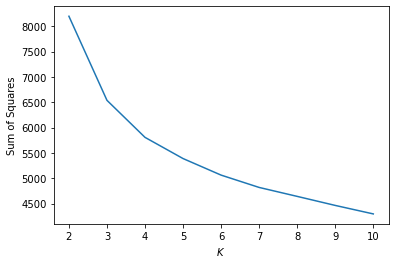

In [127]:
krange = list(range(2, 11))

ss = []

assignments = {}

for k in krange:
    kmeans = KMeans(n_clusters=k)
    k_predict = kmeans.fit_predict(hw_scaled)
    centroid = kmeans.cluster_centers_
    ss.append(np.sum((hw_scaled - centroid[k_predict]) ** 2))
    assignments[str(k)] = k_predict
    
_ = plt.plot(krange, ss)
_ = plt.xlabel("$K$")
_ = plt.ylabel("Sum of Squares")

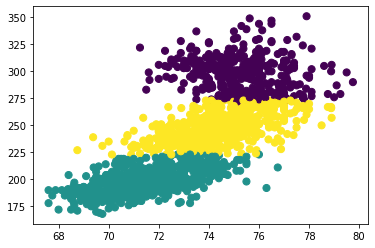

In [128]:
kmeans = KMeans(n_clusters = 3)
k_predict = kmeans.fit_predict(height_weight)
plt.scatter(height_weight.iloc[:, 0], height_weight.iloc[:, 1], c=k_predict, s=50)

In [129]:
pos = draft_df.POS
pos

0        CB
1       OLB
2        CB
3        FS
4        CB
       ... 
1628     DE
1629    OLB
1630     DT
1631     FS
1632     DE
Name: POS, Length: 1633, dtype: object

In [130]:
df = pd.DataFrame({'labels': k_predict, 'POS': pos})

print(df.sort_values(by='labels'))

      labels  POS
816        0   DT
1116       0   DE
413        0   DT
412        0   DT
1118       0   DT
...      ...  ...
1086       2  OLB
436        2  ILB
1088       2  OLB
1077       2  OLB
1632       2   DE

[1633 rows x 2 columns]


In [131]:
df.sort_values(by='labels').value_counts()

labels  POS
1       CB     359
0       DT     260
2       OLB    247
        DE     202
1       FS     166
2       ILB    154
1       SS     125
0       DE      97
2       SS       9
1       OLB      9
2       FS       5
dtype: int64

In [117]:
X = drafted[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

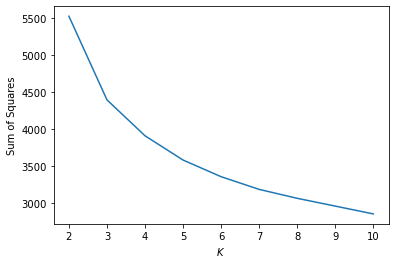

In [118]:
krange = list(range(2, 11))

ss = []

assignments = {}

for k in krange:
    kmeans = KMeans(n_clusters=k)
    k_predict = kmeans.fit_predict(X_scaled)
    centroid = kmeans.cluster_centers_
    ss.append(np.sum((X_scaled - centroid[k_predict]) ** 2))
    assignments[str(k)] = k_predict
    
_ = plt.plot(krange, ss)
_ = plt.xlabel("$K$")
_ = plt.ylabel("Sum of Squares")

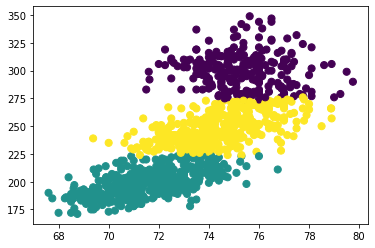

In [119]:
kmeans = KMeans(n_clusters = 3)
k_predict = kmeans.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=k_predict, s=50)